<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/Minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Minimization

Find the minumum of a function

---
## Bibliography

[1] [Optimization and fit scipy optimize](https://scipy-lectures.org/intro/scipy.html#optimization-and-fit-scipy-optimize) 
* [Example](https://scipy-lectures.org/intro/scipy/auto_examples/plot_optimize_example2.html)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.optimize as optimize
import scipy.interpolate as interpolate
import pandas as pd

## Example

Consider the following dataset

In [3]:
df=pd.DataFrame({'X':[2.5,3.1,4.5,5,5.9,6.2],
              'Y':[3,-1.01,1.5,0.7,2.8,1.5]})
df

,X,Y
0,2.5,3.00
1,3.1,-1.01
2,4.5,1.50
3,5.0,0.70
4,5.9,2.80
5,6.2,1.50


### Laggrange interpolation

In [4]:
pol=interpolate.lagrange(df.X,df.Y)

In [5]:
print(pol)

         5         4         3         2
-0.8941 x + 19.97 x - 174.7 x + 746.7 x - 1557 x + 1264


`df.X` is a Pandas Series

In [6]:
df.X

0    2.5
1    3.1
2    4.5
3    5.0
4    5.9
5    6.2
Name: X, dtype: float64

To obtain some specific value by using slices, we must use `.iloc`

Note that `df.X[3]=df.X.loc[3]=df.X.iloc[3]`

In [7]:
df.X[3],df.X.loc[3],df.X.iloc[3]

(5.0, 5.0, 5.0)

In [8]:
df.X.iloc[-1]

6.2

works!

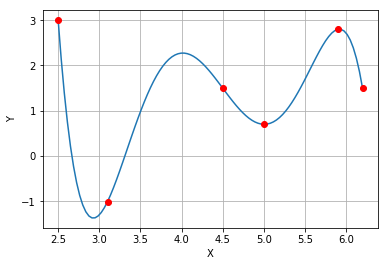

In [9]:
x=np.linspace(df.X.iloc[0],df.X.iloc[-1],100)
plt.plot(x,pol(x))
plt.plot(df.X,df.Y,'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

## Hermite interpolation
The recommend degree for the Hermite polynomial is $n-1$ where $n$ is the number of data of the dataset

In [10]:
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,5)

Text(0,0.5,'$H(x)$')

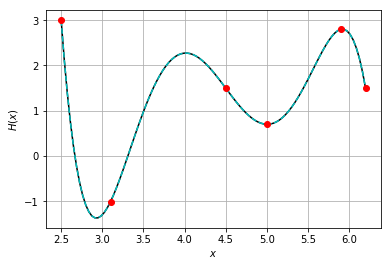

In [11]:
plt.plot(x,H(x),'k-')
plt.plot(x,pol(x),'c--')
plt.plot(df.X,df.Y,'ro')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$H(x)$')

## Finding the local minimum of a function

Finding the first minimum close to  <span style="color:red">3</span>  (which corresponds to the global minimum), and the second close to <span style="color:red">5</span>  (a  local minimum)

In [13]:
min1=optimize.fmin_powell(pol,3,full_output=True)
min2=optimize.fmin_powell(pol,5.2,full_output=True)

Optimization terminated successfully.
         Current function value: -1.374113
         Iterations: 2
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.699898
         Iterations: 2
         Function evaluations: 50


In [14]:
min1

(array(2.92784955), array(-1.37411316), array([[1.]]), 2, 28, 0)

In [15]:
print('The global minimum is f(x)={} for x={};\n the local minimum is f(x)={} for x={}'.format(
    min1[1],min1[0],min2[1],min2[0]))

The global minimum is f(x)=-1.3741131581291484 for x=2.9278495523433894;
 the local minimum is f(x)=0.6998981514389016 for x=5.004929292406532


**Activity** Find the maximum values of the Hermite interpolation function of degree 5 to the set of points: https://github.com/restrepo/ComputationalMethods/blob/master/data/hermite.csv



Text(0,0.5,'$H(x)$')

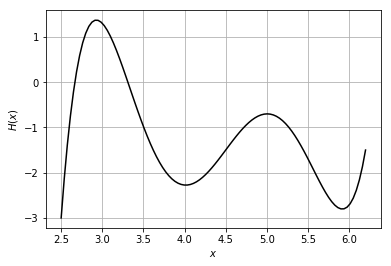

In [16]:
df=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/hermite.csv')
H=np.polynomial.hermite.Hermite.fit(df.X,df.Y,5)
x=np.linspace(df.X.iloc[0],df.X.iloc[-1],100)
plt.plot(x,-H(x),'k-')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$H(x)$')

`fmin_powell` try to search the global minimum

In [17]:
optimize.fmin_powell(-H,4.5)

Optimization terminated successfully.
         Current function value: -2.803764
         Iterations: 2
         Function evaluations: 27


array(5.918213)

### Find a local minumum

close minimum

In [18]:
min1=optimize.minimize(-H,x0=4.5)
min1['x']

array([4.01502453])

In [19]:
min1=optimize.minimize(-H,5.2)
min1['x']

array([5.91821427])

minimum in a range

In [20]:
min1=optimize.minimize(-H,x0=4,bounds=((3.5, 4.5), ) )
min1['x']

array([4.0150238])

In [21]:
xmin_local = optimize.fminbound(-H, 3.5, 4.5)
xmin_local

4.015025330027828

In [22]:
optimize.brute(-H,ranges=((3.5,4.5,0.1),))

array([4.01503906])

### Find a global minumum (alternative)

In [23]:
min1=optimize.basinhopping(-H,5.5)
min1['x']

array([5.91821428])

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
import pandas as pd

## The Higgs potential
To write greek letter inside a cell use the $\rm \LaTeX$ macro and the tab, e.g: `\mu<TAB>`, to produce μ

In [26]:
α=2

In [27]:
m_H=126 # GeV
G_F=1.1663787E-5 #GeV^-2
v=1/np.sqrt(np.sqrt(2.)*G_F) # GeV
μ=np.sqrt(m_H**2/2)
λ=m_H**2/(2.*v**2)
μ,λ

(89.09545442950498, 0.13093799079487806)

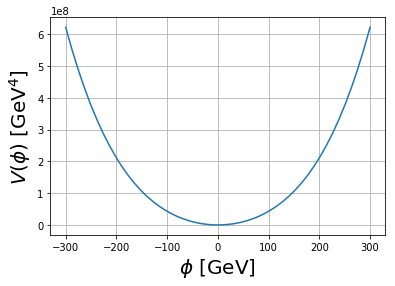

In [28]:
ϕ=np.linspace(-300,300)
Vp=lambda ϕ: 0.5*μ**2*ϕ**2+0.25*λ*ϕ**4
plt.plot(ϕ, Vp(ϕ) )
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV]',size=20)
plt.xlabel(r'$\phi$ [GeV]',size=20 )
plt.ylabel(r'$V(\phi)$ [GeV$^4$]',size=20)
plt.grid()

In [29]:
μ=μ*1j
V=lambda ϕ: Vp(ϕ).real

In [30]:
Vp(ϕ)[0].real

-92060568.64037189

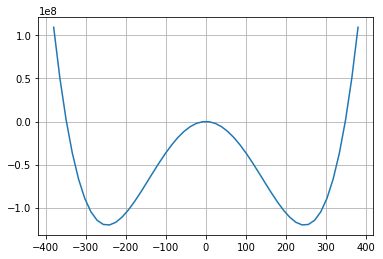

In [31]:
ϕ=np.linspace(-380,380)
plt.plot(ϕ, V(ϕ) )
plt.grid()

In [32]:
fp=optimize.fmin_powell(V,200,ftol=1E-16,full_output=True)

Optimization terminated successfully.
         Current function value: -120308559.069597
         Iterations: 4
         Function evaluations: 74


In [33]:
ϕ_min=fp[0]

In [34]:
print(ϕ_min,v)

246.21964987858152 246.21965079413738


##  Minimization in higher dimensions
<div style="float: right;" markdown="1">
    <img src="https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/mexicanhat.svg?sanitize=true" width="300">
</div>

For a complex scalar field with potential
\begin{equation}
V(\phi)=\mu^2\phi^*\phi + \lambda (\phi^*\phi)^2
\end{equation}
with 
\begin{equation}
\phi=\frac{\phi_1+i\phi_2  }{\sqrt{2} }
\end{equation}
and $\mu^2<0$, and $\lambda>0$, find some of the infinite number of minimum values of $\phi$, as illustrated in the figure, with the plane, $\phi_1-\phi_2$, moved to the minimum to easy the visualization. Expanding in terms of the real and imaginary part of $\phi$
\begin{equation}
V(\phi)=\frac{\mu^2}{2}\left(\phi_1^2+\phi_2^2 \right) + \frac{\lambda}{4}\left( \phi_1^2+\phi_2^2\right)^2
\end{equation}



In [35]:
%pylab inline
from scipy import optimize
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [36]:
def f(ϕ,m_H=126,G_F=1.1663787E-5):
    v=1/np.sqrt(np.sqrt(2.)*G_F) # GeV
    μ=np.sqrt(m_H**2/2)*1j #imaginary mass
    λ=m_H**2/(2.*v**2)
    #print(μ,λ)
    return ( 0.5*μ**2*(ϕ[0]**2+ϕ[1]**2)+0.25*λ*(ϕ[0]**2+ϕ[1]**2)**2 ).real

Check a point of the function

In [37]:
f([0,10])

-396572.6550230127

Check the minimim obtained when an inizialization point at $\phi_0=(0,0)$

In [38]:
fmin=optimize.fmin_powell(f,x0=[0,10],ftol=1E-16,full_output=True)
fmin[0]

Optimization terminated successfully.
         Current function value: -120308559.069597
         Iterations: 3
         Function evaluations: 111


array([246.21914011,  -0.50137284])

Check the proyection of the minimum in the plane $\phi_1-\phi_2$

In [39]:
print('V(ϕ)={} GeV^4'.format(fmin[1].round(1)))

V(ϕ)=-120308559.1 GeV^4


In [40]:
np.sqrt( fmin[0][0]**2+fmin[0][1]**2 )

246.21965057683713

For random initialization points, we can get several minima

In [41]:
np.random.uniform(-300,300,2)

array([-108.57625925, -172.6477193 ])

In [42]:
df=pd.DataFrame()
for i in range(1000):
    ϕ0=np.random.uniform(-300,300,2)
    ϕmin=optimize.fmin_powell(f,x0=ϕ0,ftol=1E-16,disp=False)
    df=df.append({'ϕ1':ϕmin[0],'ϕ2':ϕmin[1]},ignore_index=True)

Projection of the minima in the plane, $\phi_1,\phi_2$

In [43]:
df[:3]

,ϕ1,ϕ2
0,-195.787115,149.303457
1,-210.157023,128.289290
2,-109.067895,220.744899


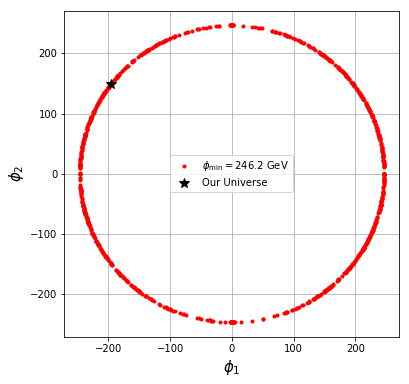

In [44]:
plt.figure( figsize=(6,6) )
plt.plot(df['ϕ1'],df['ϕ2'],'r.',label=r'$\phi_{{\rm min}}={}$ GeV'.format(
    np.sqrt(df.loc[0,'ϕ1']**2+df.loc[0,'ϕ2']**2).round(1)))
plt.plot(df.loc[0,'ϕ1'],df.loc[0,'ϕ2'],'k*',label='Our Universe',markersize=10)
plt.xlabel('$\phi_1$',size=15)
plt.ylabel('$\phi_2$',size=15)
plt.legend(loc='best')
plt.grid()

## Least action
See [Least action minimization](./least_action_minimization.ipynb)

### Further material
http://www.damtp.cam.ac.uk/user/nsm10/PrincLeaAc.pdf
https://jfuchs.hotell.kau.se/kurs/amek/prst/14_hpvp.pdf

https://www.coursera.org/learn/general-relativity/lecture/8UHtE/the-least-action-or-minimal-action-principle-part-1

https://jfi.uchicago.edu/~tten/from.panza/Physics185/Handouts/rubber-band%20analogy.pdf